In [4]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
matplotlib.style.use("ggplot")

In [6]:
data = {"x" : [13, 19, 16, 14, 15, 14],
        "y" : [40, 83, 62, 48, 58, 43]
       }

In [7]:
data = pd.DataFrame(data)

In [8]:
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


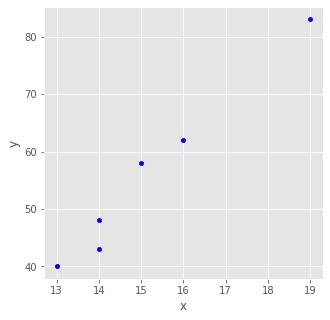

In [9]:
data.plot(kind="scatter",
         x="x",
         y="y",
         figsize=(5,5),
         color="blue")

In [10]:
data.columns=["price", "sales"]

In [11]:
data

,price,sales
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


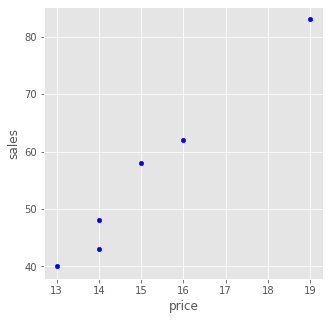

In [12]:
data.plot(kind="scatter",
         x="price",
         y="sales",
         figsize=(5,5),
         color="blue")

In [14]:
data.columns = ["x", "y"]

In [19]:
b = ((data["x"]*data["y"]).sum() - 6*data["x"].mean()*data["y"].mean()) / (
    (data["x"]**2).sum() - 6*(data["x"].mean()**2))

In [20]:
a = data["y"].mean() - b*data["x"].mean()

In [21]:
a

-55.48175182481719

In [22]:
linear_regression = linear_model.LinearRegression()

In [24]:
linear_regression.fit(X=pd.DataFrame(data["x"]), y= data["y"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
linear_regression.intercept_

-55.48175182481753

In [26]:
linear_regression.coef_

array([7.32846715])

In [27]:
linear_regression.coef_

array([7.32846715])

In [28]:
#가격 20 신차 판매액 예측
linear_regression.intercept_ + linear_regression.coef_ * 20

array([91.08759124])

In [30]:
linear_regression.predict([[20]])

array([91.08759124])

In [32]:
linear_regression.predict([[20], [30]])

array([ 91.08759124, 164.37226277])

In [35]:
#data["x"]의 예측값
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))

In [36]:
residuals = data["y"] - prediction

In [37]:
residuals

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64

In [38]:
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [39]:
residuals**2

0     0.044808
1     0.576269
2     0.051201
3     0.780063
4    12.636209
5    16.947946
Name: y, dtype: float64

In [40]:
(residuals**2).sum()

31.03649635036502

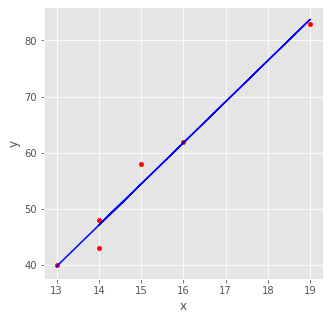

In [42]:
data.plot(kind="scatter",
         x="x",
         y="y",
         figsize=(5,5),
         color="red")

plt.plot(data["x"], prediction, color="blue")

In [43]:
from sklearn import datasets

C:\ai\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [44]:
boston_house_prices = datasets.load_boston()

In [45]:
boston_house_prices.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [46]:
boston_house_prices.data.shape

(506, 13)

In [47]:
boston_house_prices.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [48]:
boston_house_prices.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [50]:
data_frame = pd.DataFrame(boston_house_prices.data)

In [51]:
data_frame.columns = boston_house_prices.feature_names

In [52]:
data_frame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [53]:
data_frame['Price'] = boston_house_prices.target

In [54]:
boston_house_prices.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

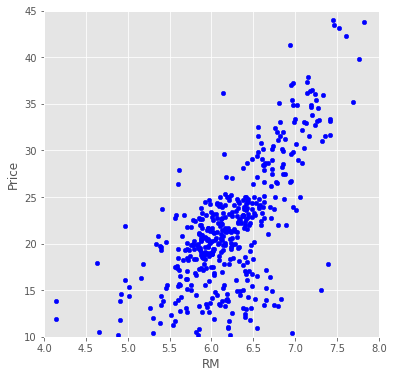

In [56]:
data_frame.plot(kind='scatter', x='RM', y='Price', figsize=(6,6),
               color='b', xlim=(4,8), ylim=(10,45))

In [57]:
data = data_frame[['RM', 'Price']]

In [58]:
data

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [60]:
linear_regression = linear_model.LinearRegression()

In [61]:
linear_regression.fit(X=pd.DataFrame(data_frame['RM']), y=data_frame['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
prediction = linear_regression.predict(X=pd.DataFrame(data_frame['RM']))

In [63]:
linear_regression.intercept_

-34.67062077643857

In [64]:
linear_regression.coef_

array([9.10210898])

In [65]:
residuals = data_frame['Price'] - prediction

In [66]:
residuals.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [68]:
data = {'x': [13, 19, 16, 14, 15, 14],
       'y': [40, 83, 62, 48, 58, 43]}

In [69]:
data = pd.DataFrame(data)

In [70]:
linear_regression = linear_model.LinearRegression()

In [71]:
linear_regression.fit(X = pd.DataFrame(data['x']), y=data['y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
prediction = linear_regression.predict(X=pd.DataFrame(data[['x']]))

In [73]:
SSE=((data['y']-prediction)**2).sum()

In [74]:
a = linear_regression.intercept_
b = linear_regression.coef_

In [75]:
((data['y']**2).sum() - (a*data['y'].sum()) - (b*data['x']*data['y']).sum())

31.036496350367088

In [76]:
SSE

31.03649635036502

In [77]:
data['y'] - data['y'].mean()

0   -15.666667
1    27.333333
2     6.333333
3    -7.666667
4     2.333333
5   -12.666667
Name: y, dtype: float64

In [80]:
SST = ((data['y'] - data['y'].mean())**2).sum()

In [81]:
SST - SSE

1226.2968369829682

In [82]:
SSR = SST - SSE

In [83]:
SSR/SST

0.9753156179610034

In [85]:
1-(SSE/SST)

0.9753156179610034

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
linear_regression.score(X=pd.DataFrame(data['x']), y=data['y'])

0.9753156179610034

In [88]:
mean_squared_error(prediction, data['y'])

5.172749391727503

In [89]:
mean_squared_error(prediction, data['y']) ** 0.5

2.2743679103714736